<a href="https://colab.research.google.com/github/gracejeffery/my-code/blob/main/GraceJeffery-Project1-DataVisualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

FoodHub Data Analysis



### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [ ]:
# uploading drive to Google Colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# read the data
df = pd.read_csv('/content/drive/MyDrive/data science MIT <3/foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data?

In [ ]:
# finding rows and columns of the Data Frame
df.shape

(1898, 9)

#### Observations: This data set has 1898 rows and 9 columns.


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used)

In [ ]:
# finding the data types of each column in the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
There are three types of data: int64, object, float64.

numerical data:
  order_id, customer_id, food_preparation_time, delivery_time = INTEGERS;
  cost_of_order = FLOAT

categorical data:
  restaurant_name, cuisine_type, day_of_the_week, rating = STRING


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method

In [ ]:
# determining whether there are any missing values in the data set
df.isnull().values.any()

False

#### Observations:
There are no missing values in the data.

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed?

In [ ]:
# displays the 5 point statistical summary, count, mean and stv of numerical data
round(df.describe(), 2)

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1898.00,1898.00,1898.00,1898.00,1898.00
mean,1477495.50,171168.48,16.50,27.37,24.16
std,548.05,113698.14,7.48,4.63,4.97
min,1476547.00,1311.00,4.47,20.00,15.00
25%,1477021.25,77787.75,12.08,23.00,20.00
50%,1477495.50,128600.00,14.14,27.00,25.00
75%,1477969.75,270525.00,22.30,31.00,28.00
max,1478444.00,405334.00,35.41,35.00,33.00


#### Observations:
The minimum time it takes for food to be prepared is 20 minutes.
The average time is 27.37 minutes.
The maximum time is 35 minutes.

### **Question 5:** How many orders are not rated?

In [ ]:
# calculates how many orders are not rated
(df['rating']=="Not given").sum()

736

#### Observations:
736 orders are unrated.

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration)

[Text(0.5, 1.0, '5 Point Summary of Prices')]

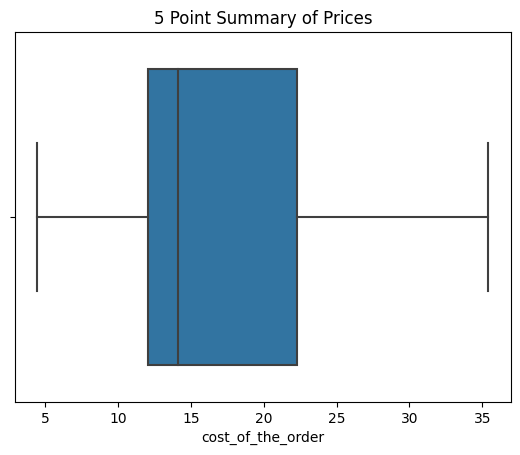

In [ ]:
# Box Plot for Cost of Orders Distribution
import seaborn as sns
sns.boxplot(x = 'cost_of_the_order', data=df).set(title = "5 Point Summary of Prices")

The price of an order ranges from 5 dollars to 35 dollars, but 50% of the orders fall between about 12 dollars and 22.50. The median is just less than 15 dollars, which seems reasonable.

[Text(0.5, 1.0, '5 Point Summary of Prep Time')]

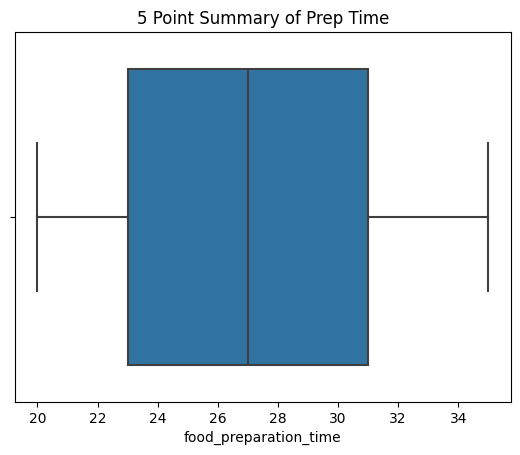

In [ ]:
# Box Plot for Preparation Time Distribution
sns.boxplot(x = 'food_preparation_time', data=df).set(title = "5 Point Summary of Prep Time")

The median food preparation time is 27 minutes. Prep can take as little as 20 minutes and up to 35 minutes. The data is barely skewed. 50% of the orders are ready for pickup between 23 and 31 minutes.

[Text(0.5, 1.0, '5 Point Summary of Delivery Time')]

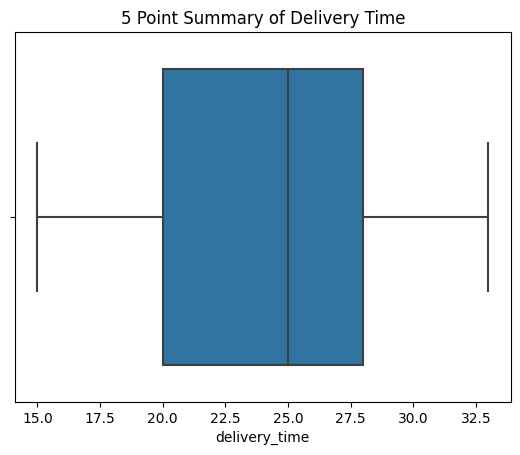

In [ ]:
# Box Plot for Delivery Time
sns.boxplot(x = "delivery_time", data=df).set(title = "5 Point Summary of Delivery Time")

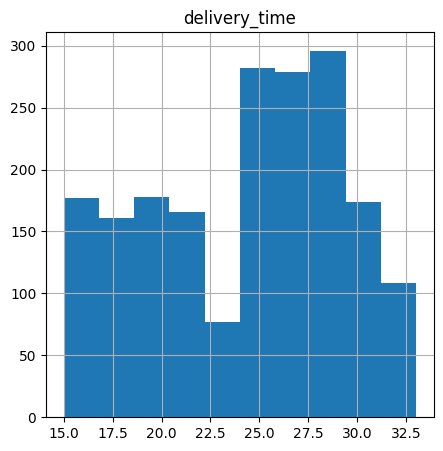

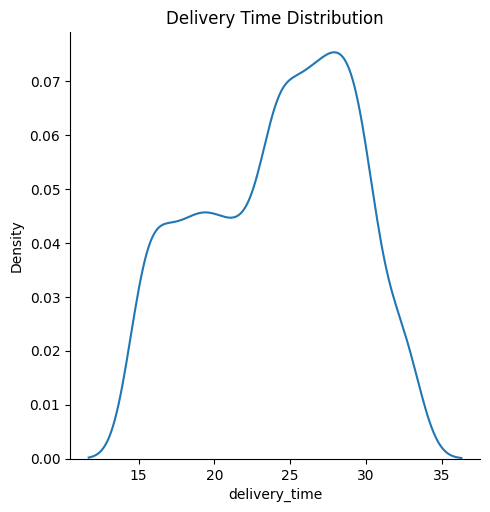

In [ ]:
# Histogram displaying Delivery Time
df.hist("delivery_time", figsize = (5,5))
sns.displot(df['delivery_time'],kind="kde").set(title="Delivery Time Distribution")

The box plot shows the median delivery time is 25 minutes. The shortest delivery time was 15 minutes and the longest was about 33 minutes. 50% of the orders were delivered between 20 and about 28 minutes. The histogram shows some further insights. There are two peaks; approximately 675 orders took between 15 to 22 minutes to be delivered and approximately 1020 orders took between 24 and 31 minutes.

[Text(0.5, 1.0, 'Number of Orders Placed on Weekends and Weekdays')]

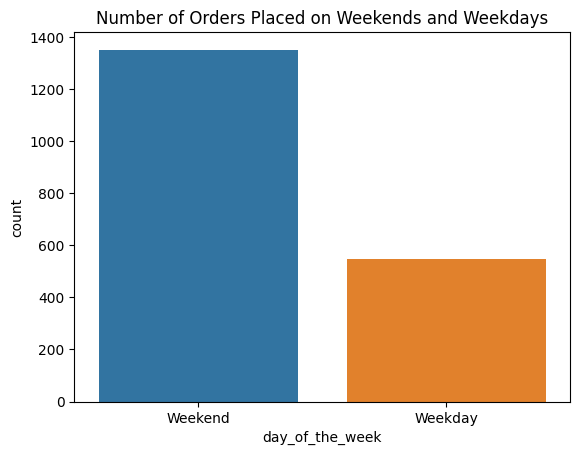

In [ ]:
# Count Plot comparing the number of orders depending on the day of the week
sns.countplot(x = "day_of_the_week", data=df).set(title="Number of Orders Placed on Weekends and Weekdays")

There were over 1300 orders on the weekends, and just under 600 made during the week. The weekend is clearly a more popular time to order food.

[Text(0.5, 1.0, 'Most Popular Restaurants'),
 Text(0.5, 0, '# of orders'),
 Text(0, 0.5, 'Restaurant')]

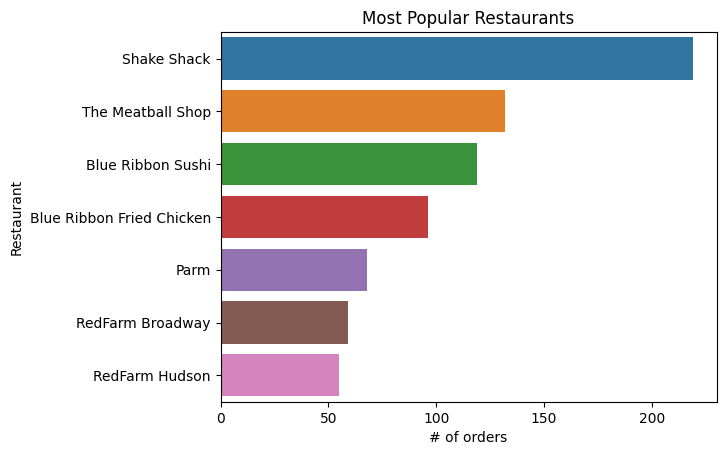

In [ ]:
# Bar Plot for the order count from Restaurants
# There are 178 restaurants, so only graphed the most popular restaurants by finding which had more than 50 orders

counts = df.value_counts("restaurant_name").reset_index(name="counts")
counts = counts[counts['counts'] >= 50]
sns.barplot(x = "counts", y = "restaurant_name", data=counts).set(title = "Most Popular Restaurants", xlabel = "# of orders", ylabel = "Restaurant")

In [ ]:
# exact order counts from the most popular restaurants
counts

,restaurant_name,counts
0,Shake Shack,219
1,The Meatball Shop,132
2,Blue Ribbon Sushi,119
3,Blue Ribbon Fried Chicken,96
4,Parm,68
5,RedFarm Broadway,59
6,RedFarm Hudson,55


Shake Shack by far received the most orders: 219. The Meatball Shop was also popular, receiving nearly 132 orders. Only 7 restaurants received over 50 orders out of the 178 total restaurants.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'Korean'),
  Text(1, 0, 'Japanese'),
  Text(2, 0, 'Mexican'),
  Text(3, 0, 'American'),
  Text(4, 0, 'Indian'),
  Text(5, 0, 'Italian'),
  Text(6, 0, 'Mediterranean'),
  Text(7, 0, 'Chinese'),
  Text(8, 0, 'Middle Eastern'),
  Text(9, 0, 'Thai'),
  Text(10, 0, 'Southern'),
  Text(11, 0, 'French'),
  Text(12, 0, 'Spanish'),
  Text(13, 0, 'Vietnamese')])

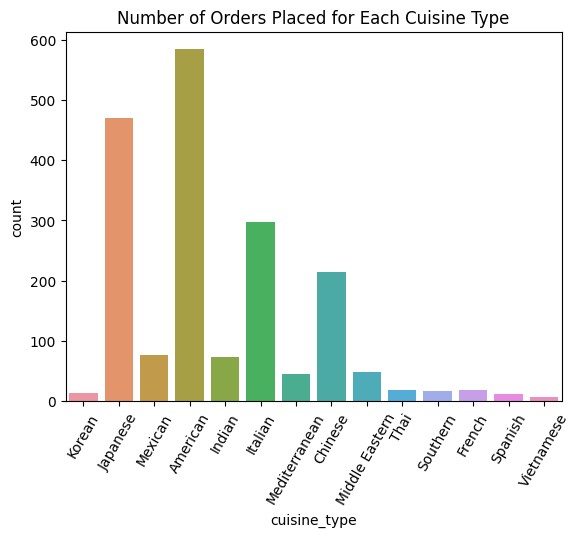

In [ ]:
# Count Plot for Cuisine Type
sns.countplot(x = "cuisine_type", data=df).set(title="Number of Orders Placed for Each Cuisine Type")
plt.xticks(rotation=60)

There were nearly 600 American food orders, making it the most popular cuisine type by far. Japanese food was also popular with just over 450 orders. Italian and Chinese food also had hundreds of orders. Otherwise, every other type of cuisine did not receive over 100 orders. Vietnamese food was ordered the least.

[Text(0.5, 1.0, 'Order Ratings')]

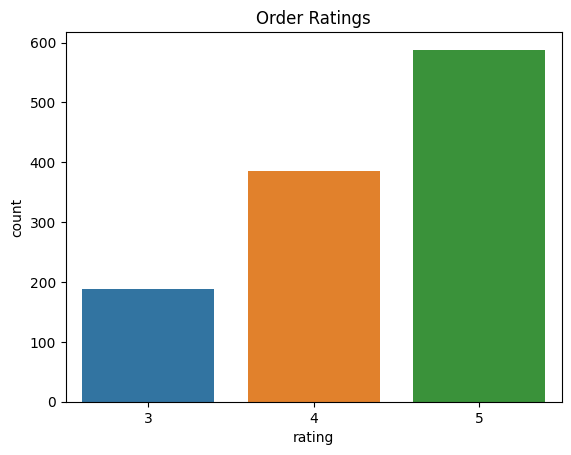

In [ ]:
# Count Plot for Ratings
# 736 ratings are not given, so a new data frame is created removing the unrated orders

rated = df[df.rating != "Not given"]
sns.countplot(x = "rating", data=rated, order=rated['rating'].value_counts(ascending=True).index).set(title="Order Ratings")

In [ ]:
df.value_counts("rating")

rating
Not given    736
5            588
4            386
3            188
dtype: int64

588 of the rated orders received a rating of 5. 386 orders received a 4, and 188 received a 3. It is excellent that the majority of orders are receiving the maximum rating. However, 736 people did not give a rating, which might mean they were happy or not, we just don't know.

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received?

In [ ]:
# counting the number of orders from each restaurant
df.value_counts("restaurant_name")

restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
                            ... 
Klong                          1
Kambi Ramen House              1
Il Bambino                     1
Hunan Manor                    1
Lamarca Pasta                  1
Length: 178, dtype: int64

#### Observations:
Shake Shack: 219 orders,
Meatball Shop: 132 orders,
Blue Ribbon Sushi: 119 orders,
Blue Ribbon Fried Chicken: 96 orders,
Parm: 68 orders

### **Question 8**: Which is the most popular cuisine on weekends?

In [ ]:
# creating a table comparing the number of orders placed for each cuisine type depending on day of the week
pd.crosstab(df['cuisine_type'],df['day_of_the_week'] )

day_of_the_week,Weekday,Weekend
cuisine_type,,
American,169,415
Chinese,52,163
French,5,13
Indian,24,49
Italian,91,207
Japanese,135,335
Korean,2,11
Mediterranean,14,32
Mexican,24,53


#### Observations:
American food is the most popular cuisine on weekends by far, receiving 415 orders.

### **Question 9**: What percentage of the orders cost more than 20 dollars?

In [ ]:
# finding the percentage of orders over $20

# first count the number of orders over $20
count = len(df[df['cost_of_the_order'] > 20.0])
print(count, "orders over $20.00")

# count the total orders by finding the length of the column
total_orders = len(df['cost_of_the_order'])
print(total_orders, "orders in total")

# divide the number of orders over $20 by the total number of orders
percentage = count / total_orders * 100
format_percentage = "{:.2f}".format(percentage)

print(count, "/", total_orders, "* 100 =",  format_percentage)
print(format_percentage, '% of the orders cost more than $20.00', sep='')

555 orders over $20.00
1898 orders in total
555 / 1898 * 100 = 29.24
29.24% of the orders cost more than $20.00


#### Observations:
29.24% of the orders cost over $20.00.

### **Question 10**: What is the mean order delivery time?

In [ ]:
# calculating the mean of all values in delivery time column
df["delivery_time"].mean()

24.161749209694417

#### Observations:
The mean delivery time is 24.16 minutes

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed

In [ ]:
# counting the number of orders placed by each customer
df.value_counts("customer_id")

customer_id
52832     13
47440     10
83287      9
250494     8
65009      7
          ..
105903     1
105992     1
106006     1
106324     1
405334     1
Length: 1200, dtype: int64

#### Observations:
Customer **52832** made 13 orders, **47440** made 10 orders, and **83287** made 9 orders

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'Korean'),
  Text(1, 0, 'Japanese'),
  Text(2, 0, 'Mexican'),
  Text(3, 0, 'American'),
  Text(4, 0, 'Indian'),
  Text(5, 0, 'Italian'),
  Text(6, 0, 'Mediterranean'),
  Text(7, 0, 'Chinese'),
  Text(8, 0, 'Middle Eastern'),
  Text(9, 0, 'Thai'),
  Text(10, 0, 'Southern'),
  Text(11, 0, 'French'),
  Text(12, 0, 'Spanish'),
  Text(13, 0, 'Vietnamese')])

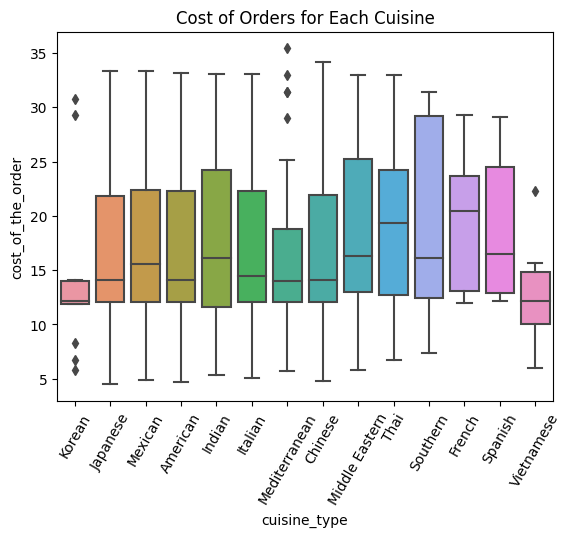

In [ ]:
# Box Plot to compare cuisine type and cost of orders
sns.boxplot(x = "cuisine_type", y = "cost_of_the_order", data=df).set(title="Cost of Orders for Each Cuisine")
plt.xticks(rotation=60)

French and Spanish food have the highest minimum cost. French food has the highest median cost. Mediterranean and Vietnamese food have the lowest maximum costs. Most cuisines share a median value of about $15.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'Korean'),
  Text(1, 0, 'Japanese'),
  Text(2, 0, 'Mexican'),
  Text(3, 0, 'American'),
  Text(4, 0, 'Indian'),
  Text(5, 0, 'Italian'),
  Text(6, 0, 'Mediterranean'),
  Text(7, 0, 'Chinese'),
  Text(8, 0, 'Middle Eastern'),
  Text(9, 0, 'Thai'),
  Text(10, 0, 'Southern'),
  Text(11, 0, 'French'),
  Text(12, 0, 'Spanish'),
  Text(13, 0, 'Vietnamese')])

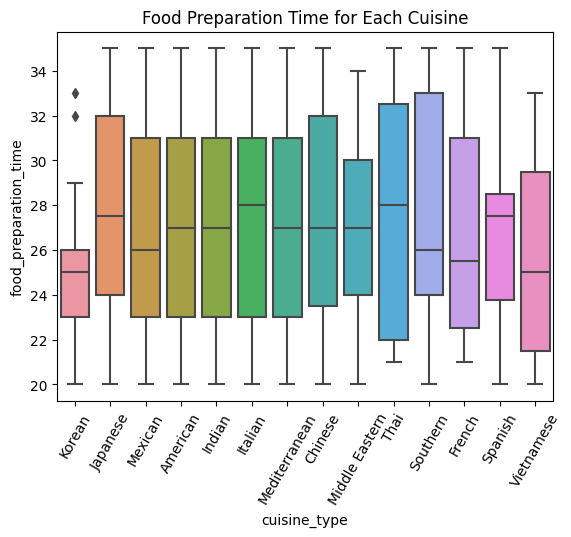

In [ ]:
# Boxplot to compare cuisine type and food prep time
sns.boxplot(x = "cuisine_type", y = "food_preparation_time", data=df).set(title="Food Preparation Time for Each Cuisine")
plt.xticks(rotation=60)

Korean food has the lowest food preparation time. It is interesting that many cuisines share similar distributions for food preparation time. It's odd that no food type has less than 20 minutes prep time.

<Axes: xlabel='rating', ylabel='delivery_time'>

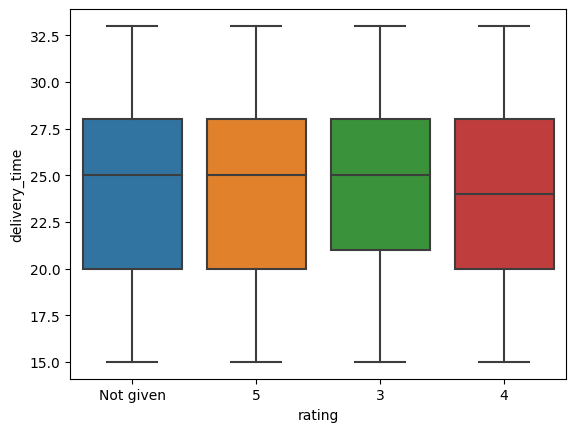

In [ ]:
# Boxplot comparing rating and delivery time
sns.boxplot(x = "rating", y = "delivery_time", data=df)

It doesn't appear that the delivery time affects the rating given. The distribution of delivery times for each rating is very similar.

[Text(0.5, 1.0, 'Cost of Orders on the Weekend and Weekdays')]

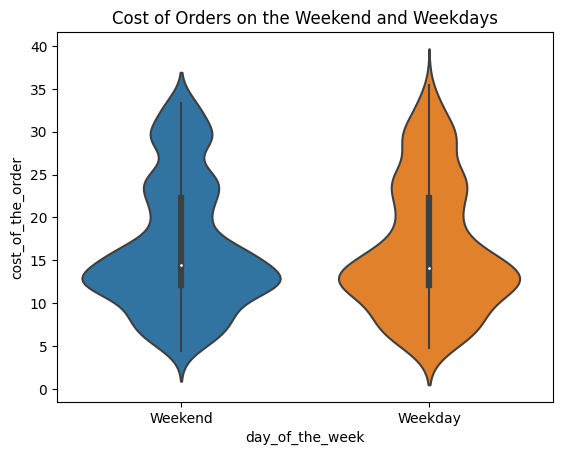

In [ ]:
# Violin Plot comparing the day of the week and the cost of the order
sns.violinplot(x = "day_of_the_week", y = "cost_of_the_order", data=df).set(title="Cost of Orders on the Weekend and Weekdays")

The day of the week does not seem to change the cost of the order.

[Text(0.5, 1.0, 'Time Taken to Deliver Orders Based on Day')]

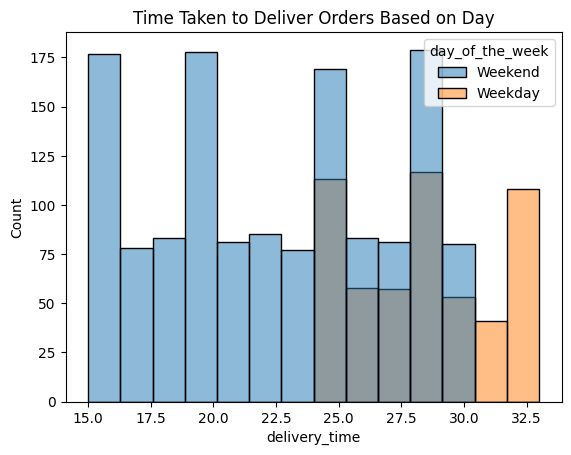

In [ ]:
# Histogram for delivery time on weekdays and the weekend
sns.histplot(x = "delivery_time", hue="day_of_the_week", data=df).set(title="Time Taken to Deliver Orders Based on Day")

Delivery times on weekends is far shorter than during the week most of the time. Could this be related to the number of delivery drivers available, perhaps the company could increase compensation to attract more drivers?

<Axes: >

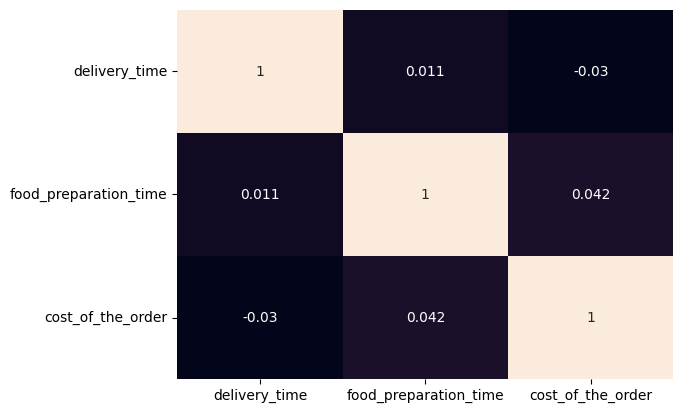

In [ ]:
# heat map comparing all three numerical variables
sns.heatmap(
    data=df[["delivery_time", "food_preparation_time", "cost_of_the_order"]].corr(),
    annot=True,
    cbar=False
)

The heat map shows that there is almost no correlation between the numerical variables.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'Korean'),
  Text(1, 0, 'Japanese'),
  Text(2, 0, 'Mexican'),
  Text(3, 0, 'American'),
  Text(4, 0, 'Indian'),
  Text(5, 0, 'Italian'),
  Text(6, 0, 'Mediterranean'),
  Text(7, 0, 'Chinese'),
  Text(8, 0, 'Middle Eastern'),
  Text(9, 0, 'Thai'),
  Text(10, 0, 'Southern'),
  Text(11, 0, 'French'),
  Text(12, 0, 'Spanish'),
  Text(13, 0, 'Vietnamese')])

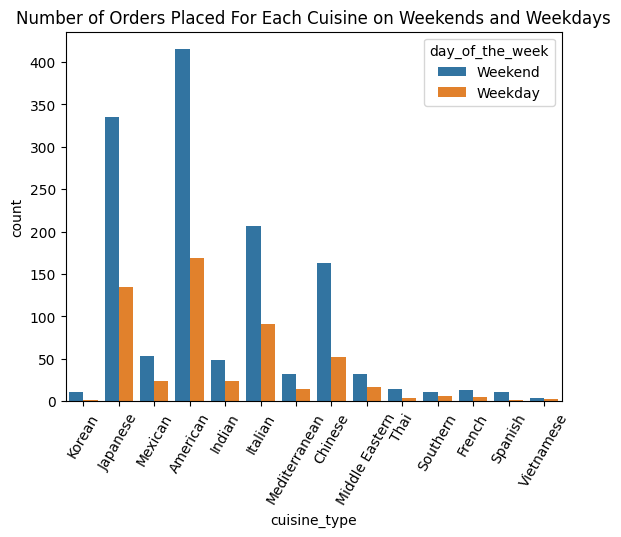

In [ ]:
# count plot comparing the number of orders for each cuisine type on the weekend and during the week
sns.countplot(data=df, x = "cuisine_type", hue="day_of_the_week").set(title="Number of Orders Placed For Each Cuisine on Weekends and Weekdays")
plt.xticks(rotation=60)

For each cuisine type, the number of orders made on the weekend exceeds the number made during the week.

<ipython-input-70-8fc15fb3b3c0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rated['rating'] = rated['rating'].astype(int)


[Text(0.5, 1.0, 'Ratings for Each Cuisine')]

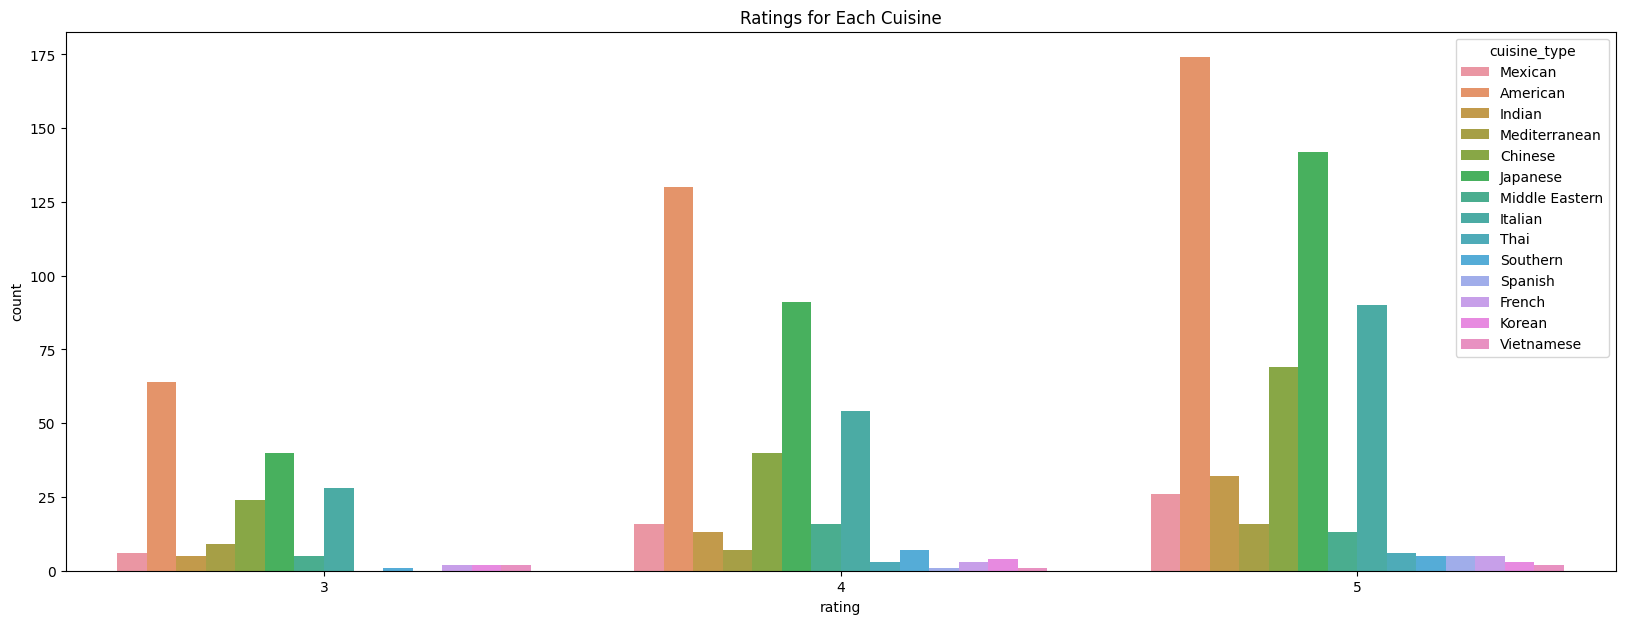

In [ ]:
# Count plot comparing the ratings for each cuisine type

# first need to convert the rating column from an object to an integer using previous data frame 'rated' which only has the rated orders
rated['rating'] = rated['rating'].astype(int)
plt.figure(figsize=(20,7))
sns.countplot(data=rated, x="rating", hue="cuisine_type").set(title="Ratings for Each Cuisine")

In [ ]:
pd.crosstab(df['cuisine_type'],df['rating'] )

rating,3,4,5,Not given
cuisine_type,,,,
American,64,130,174,216
Chinese,24,40,69,82
French,2,3,5,8
Indian,5,13,32,23
Italian,28,54,90,126
Japanese,40,91,142,197
Korean,2,4,3,4
Mediterranean,9,7,16,14
Mexican,6,16,26,29


Korean, Mediterranean, Middle Eastern, Southern, and Vietnamese have relatively low ratings compared to all other cuisine types.

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer

In [ ]:
# first, find which restaurants have over 50 ratings

rest = rated.value_counts("restaurant_name")
rest.head(10)
# only 4 restaurants have more than 50 orders

restaurant_name
Shake Shack                  133
The Meatball Shop             84
Blue Ribbon Sushi             73
Blue Ribbon Fried Chicken     64
RedFarm Broadway              41
Parm                          39
RedFarm Hudson                34
TAO                           28
Rubirosa                      24
Nobu Next Door                23
dtype: int64

In [ ]:
# create a new data frame with only these four restaurants and a new column for rating count
counts1 = rated.value_counts("restaurant_name").reset_index(name="Counts")
counts1 = counts1[counts1['Counts'] >= 50]
counts1

,restaurant_name,Counts
0,Shake Shack,133
1,The Meatball Shop,84
2,Blue Ribbon Sushi,73
3,Blue Ribbon Fried Chicken,64


In [ ]:
# create a new data frame by merging 'rated' and 'counts1'
top4 = pd.merge(rated, counts1, how="inner", on="restaurant_name")
top4['rating'] = top4['rating'].astype(int)
top4

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,Counts
0,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,64
1,1476966,129969,Blue Ribbon Fried Chicken,American,24.30,Weekend,5,23,17,64
2,1477475,65009,Blue Ribbon Fried Chicken,American,32.93,Weekend,5,24,23,64
3,1476921,121476,Blue Ribbon Fried Chicken,American,12.18,Weekday,3,29,27,64
4,1476770,65009,Blue Ribbon Fried Chicken,American,7.86,Weekday,4,22,33,64
...,...,...,...,...,...,...,...,...,...,...
349,1477548,79255,The Meatball Shop,Italian,12.95,Weekday,4,29,24,84
350,1477222,348096,The Meatball Shop,Italian,11.64,Weekend,4,23,24,84
351,1478320,85091,The Meatball Shop,Italian,13.53,Weekday,3,20,31,84
352,1478277,48282,The Meatball Shop,American,14.50,Weekend,5,34,25,84


In [ ]:
# group the restaurants and their mean ratings to check if it is greater than 4
top4.groupby(by = ['restaurant_name'])['rating'].mean()

restaurant_name
Blue Ribbon Fried Chicken    4.328125
Blue Ribbon Sushi            4.219178
Shake Shack                  4.278195
The Meatball Shop            4.511905
Name: rating, dtype: float64

#### Observations:
Four restaurants will recieve the promotion:
Blue Ribbon Fried Chicken, Blue Ribbon Sushi, Shake Shack, and The Meatball Shop

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders

In [ ]:
# finding net revenue for the delivery business:

# iterate through the dataframe getting each order's cost,
# summing revenue as needed (25% on orders equal to or greater than
# $20 and 15% on orders over $5 and < $20)

sum = 0

for cost in df.cost_of_the_order:
      if cost > 20.0:
          sum += cost * 0.25
      elif cost > 5.0:
          sum += cost * 0.15

round(sum, 2)

6166.3

#### Observations:
The company generated $6166.30.

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered)

In [ ]:
# calculating the percentage of orders that take more than an hour to be delivered from time order is placed

# first, sum the food prep time and delivery time, inserting this new piece of data in a new column 'total_time'
df['total_time'] =  df[['food_preparation_time', 'delivery_time']].sum(axis=1)

# count how many exceed 60
count = (df["total_time"] > 60).sum()
print(count, "orders took more than 60 minutes.")

# divide the count by the total number of orders to find percentage
perc = count / len(df["total_time"]) * 100
print("That is", perc.round(2), "% of all orders.")

200 orders took more than 60 minutes.
That is 10.54 % of all orders.


#### Observations:
10.54% of orders took over an hour to be delivered from the time the order was placed.

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends?

In [ ]:
# group the data by day of the week and mean delivery time
df.groupby(by = ['day_of_the_week'])['delivery_time'].mean()

day_of_the_week
Weekday    28.340037
Weekend    22.470022
Name: delivery_time, dtype: float64

#### Observations:
The average delivery time during the week is about 28 minutes, meanwhile on the weekend, the average time is about 22 minutes.

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations)

### Conclusions:
*  Most of the food orders were American, Japanese, Italian, and Chinese cuisine. The rest of the cuisines each had less than 100 orders. Vietnamese, Spanish, and Korean were the least popular cuisines.
*  Many more orders are placed on the weekend compared to during the week. Over 1300 orders were placed on the weekend and nearly 600 were placed during the week.
*  10% of the orders take over an hour to be delivered from the time the order is placed. This could cause customer satisfaction problems.
*  Delivery time is far quicker on the weekends on average.
*  736 people did not give a rating - that is nearly 40% of all orders. Of the people who did give a rating, the majority gave a rating of 5. However, nearly 200 people still rated a 3.
*   5 restaurants were by far the most popular: Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken, and Parm.

### Recommendations:

*  Because there are far less orders placed during the week, the business could consider offering a promotion or discount to customers to encourage them to order during the week.
* Look further into why some orders take over an hour to be delivered. If there is a pattern for a specific restaurant always taking too long to prepare the food, give them that feedback. People want their food as soon as possible!
* Delivery time is much faster on the weekends. Is that because there are more delivery workers working on the weekends? You could look into offering higher wages during the week to encourage more delivery workers to work which should in turn reduce delivery times.
* In order to shorten delivery times, it would be smart to shorten the amount of time the food is sitting and waiting to be picked up by a delivery worker after it has been prepared. We can further study the food preparation time for each cuisine and based upon mean prep time and standard deviations we can determine the best time for the delivery worker to arrive so that the food is not sitting around.
* To improve the quality of data collected, the end user app could be changed such that it is manditory to rate the service, thus avoiding "No Rating" instances.

---

In [ ]:
! pwd

/content


In [ ]:
%%shell
jupyter nbconvert --to html ////content/drive/MyDrive/GraceJefferyProject.ipynb

[NbConvertApp] WARNING | pattern '////content/drive/MyDrive/GraceJefferyProject.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--Jupyter

CalledProcessError: Command 'jupyter nbconvert --to html ////content/drive/MyDrive/GraceJefferyProject.ipynb
' returned non-zero exit status 255.